In [1]:
#### Get subset of ids for JRB basins ####

import geopandas as gpd


gdf = gpd.read_file(r"C:\Users\LeoLo\Desktop\jrb\jrb_2.gpkg", layer="flowpaths")
nexus = gpd.read_file(r"C:\Users\LeoLo\Desktop\jrb\jrb_2.gpkg", layer="nexus")
# Many more layers 'flowpaths', 'divides', 'lakes', 'nexus', 'pois', 'hydrolocations', 'flowpath-attributes', 
# 'flowpath-attributes-ml', 'network', 'divide-attributes'

# print(gdf.head())
print(f"Basins in Juniata RB: {gdf.divide_id} (unique: {gdf.divide_id.nunique()})")

# Select subset of divide_ids
jrb_divide_ids = list(gdf.divide_id)[0:1]
print(f"selecting divide_id: {jrb_divide_ids}")

Basins in Juniata RB: 0      cat-88306
1      cat-87647
2      cat-88001
3      cat-88268
4      cat-88269
         ...    
789    cat-88404
790    cat-88405
791    cat-88318
792    cat-87405
793    cat-87639
Name: divide_id, Length: 794, dtype: object (unique: 794)
selecting divide_id: ['cat-88306']


In [87]:
gdf = gpd.read_file(r"C:\Users\LeoLo\Desktop\jrb\jrb_2.gpkg", layer="network")
# gdf[gdf['divide_id'].isin(jrb_divide_ids)]
gdf.keys()

Index(['id', 'toid', 'divide_id', 'ds_id', 'mainstem', 'hydroseq', 'hf_source',
       'hf_id', 'lengthkm', 'areasqkm', 'tot_drainage_areasqkm', 'type',
       'vpuid', 'hf_hydroseq', 'hf_lengthkm', 'hf_mainstem', 'topo', 'poi_id',
       'hl_uri'],
      dtype='object')

In [88]:
gdf

,id,toid,divide_id,ds_id,mainstem,hydroseq,hf_source,hf_id,lengthkm,areasqkm,tot_drainage_areasqkm,type,vpuid,hf_hydroseq,hf_lengthkm,hf_mainstem,topo,poi_id,hl_uri
0,wb-87647,nex-87403,cat-87647,NaN,74069.0,27606.0,NOAA Reference Fabric,4699069.0,6.215410,10.463851,10.463851,nexus,02,74072.0,4.807146,74069.0,fl-nex,None,None
1,wb-87647,nex-87403,cat-87647,NaN,74069.0,27606.0,NOAA Reference Fabric,4698971.0,6.215410,10.463851,10.463851,nexus,02,74070.0,1.354542,74069.0,fl-nex,None,None
2,wb-87647,nex-87403,cat-87647,NaN,74069.0,27606.0,NOAA Reference Fabric,4700069.0,6.215410,10.463851,10.463851,nexus,02,74069.0,0.053722,74069.0,fl-nex,None,None
3,wb-87647,nex-87403,cat-87647,NaN,74069.0,27606.0,NOAA Reference Fabric,4699013.0,6.215410,10.463851,10.463851,nexus,02,74071.0,1.707256,74071.0,fl-nex,None,None
4,wb-88284,nex-88285,cat-88284,NaN,76281.0,27601.0,NOAA Reference Fabric,4682090.0,2.952802,7.841250,7.841250,nexus,02,76283.0,1.646237,76281.0,fl-nex,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3455,nex-88385,wb-88385,None,NaN,NaN,NaN,NOAA Reference Fabric,NaN,NaN,NaN,NaN,nexus,02,NaN,NaN,NaN,fl-nex,None,None
3456,nex-88388,wb-88388,None,NaN,NaN,NaN,NOAA Reference Fabric,NaN,NaN,NaN,NaN,nexus,02,NaN,NaN,NaN,fl-nex,None,None
3457,nex-88395,wb-88395,None,NaN,NaN,NaN,NOAA Reference Fabric,NaN,NaN,NaN,NaN,nexus,02,NaN,NaN,NaN,fl-nex,None,None
3458,nex-88396,wb-88396,None,NaN,NaN,NaN,NOAA Reference Fabric,NaN,NaN,NaN,NaN,nexus,02,NaN,NaN,NaN,fl-nex,None,None


In [34]:
# Get the CRS projection; need to use the 'flowpaths' layer
gdf.crs

<Projected CRS: EPSG:5070>
Name: NAD83 / Conus Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - CONUS onshore - Alabama; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming.
- bounds: (-124.79, 24.41, -66.91, 49.38)
Coordinate Operation:
- name: Conus Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [18]:
print(gdf[gdf['divide_id'].isin(jrb_divide_ids)])

         id       toid  mainstem  order  hydroseq  lengthkm  areasqkm  \
0  wb-88306  nex-87405   76359.0    1.0     27607  3.777694  3.253501   

   tot_drainage_areasqkm  has_divide  divide_id poi_id vpuid  \
0               3.253501        True  cat-88306   None    02   

                                            geometry  
0  LINESTRING (1517501.298 2076360.759, 1517448.6...  


In [60]:
#### Convert catchment data gdf to geojson ####

import json
from shapely.geometry import Polygon


filtered_gdf = gdf[gdf['divide_id'].isin(jrb_divide_ids)]

# Reproject to WGS84 (4326)
filtered_gdf = filtered_gdf.to_crs('EPSG:4326')
print(f"converted CRS -> {filtered_gdf.crs}\n")

# Ensure the LINESTRING is closed (first and last points are the same)
line = filtered_gdf.iloc[0].geometry
if line.coords[0] != line.coords[-1]:
    line = Polygon(list(line.coords) + [line.coords[0]])

# Update the geometry in the GeoDataFrame
filtered_gdf.at[filtered_gdf.index[0], 'geometry'] = line

# Create GeoJSON object with structure for ngen.
geojson = {
    "type": "FeatureCollection",
    "name": "catchment_data",
    "crs": {
        "type": "name",
        "properties": {"name": "urn:ogc:def:crs:OGC:1.3:CRS84"}
    },
    "features": [
        {
            "type": "Feature",
            "id": filtered_gdf.iloc[0]['divide_id'],  # Use divide_id as the feature ID
            "properties": {
                "area_sqkm": filtered_gdf.iloc[0]['areasqkm'],  # Area in square kilometers
                "toid": filtered_gdf.iloc[0]['toid']  # Related identifier
            },
            "geometry": {
                "type": "Polygon",
                "coordinates": [list(line.exterior.coords)]  # Extract polygon coordinates
            }
        }
    ]
}

# Save as GeoJSON
with open('catchment_data_cat-88306.geojson', 'w') as f:
    json.dump(geojson, f, indent=2)

# Or print it for inspection
print(json.dumps(geojson, indent=2))

converted CRS -> EPSG:4326

{
  "type": "FeatureCollection",
  "name": "catchment_data",
  "crs": {
    "type": "name",
    "properties": {
      "name": "urn:ogc:def:crs:OGC:1.3:CRS84"
    }
  },
  "features": [
    {
      "type": "Feature",
      "id": "cat-88306",
      "properties": {
        "area_sqkm": 3.2535007694995497,
        "toid": "nex-87405"
      },
      "geometry": {
        "type": "Polygon",
        "coordinates": [
          [
            [
              -77.85856898958792,
              40.39362240396771
            ],
            [
              -77.85970558958616,
              40.39167887063743
            ],
            [
              -77.86024398958534,
              40.390192603973055
            ],
            [
              -77.86024412291869,
              40.389552270640685
            ],
            [
              -77.8601543895855,
              40.38950660397411
            ],
            [
              -77.85988532291924,
              40.388751

In [63]:
#### Convert nexus data gdf to geojson ####

filtered_nexus = nexus[nexus['id'] == filtered_gdf.iloc[0]['toid']]

# Reproject to WGS84 (4326)
filtered_nexus = filtered_nexus.to_crs('EPSG:4326')
print(f"converted CRS -> {filtered_nexus.crs}\n")

# Create GeoJSON object with structure for ngen.
geojson = {
    "type": "FeatureCollection",
    "name": "nexus_data",
    "crs": {
        "type": "name",
        "properties": {"name": "urn:ogc:def:crs:OGC:1.3:CRS84"}
    },
    "features": [
        {
            "type": "Feature",
            "id": row['id'],  # Use the 'id' column as the feature ID
            "properties": {
                "nexus_type": row['type'],  # Use the 'type' column
                "toid": row['toid']         # Use the 'toid' column
            },
            "geometry": {
                "type": "Point",
                "coordinates": [row.geometry.x, row.geometry.y]  # Longitude first, then latitude
            }
        }
        for _, row in filtered_nexus.iterrows()  # Iterate over rows in the GeoDataFrame
    ]
}

# Save as GeoJSON
with open('nexus_data_nex-87405.geojson', 'w') as f:
    json.dump(geojson, f, indent=2)

# Or print it for inspection
print(json.dumps(geojson, indent=2))

converted CRS -> EPSG:4326

{
  "type": "FeatureCollection",
  "name": "nexus_data",
  "crs": {
    "type": "name",
    "properties": {
      "name": "urn:ogc:def:crs:OGC:1.3:CRS84"
    }
  },
  "features": [
    {
      "type": "Feature",
      "id": "nex-87405",
      "properties": {
        "nexus_type": "nexus",
        "toid": "wb-87405"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [
          -77.83367525629326,
          40.36467900401266
        ]
      }
    }
  ]
}


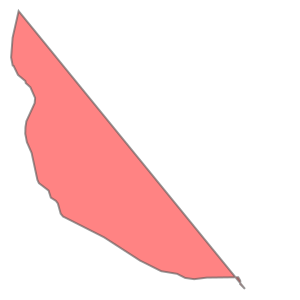

In [15]:
filtered_gdf.iloc[0].geometry


In [3]:
# Load netcdf forcing and attribute files + trim to JRB.
import xarray as xr
import numpy as np


attrs_path = r"C:\Users\LeoLo\Desktop\attributes.nc"
forc_path = r"X:\forcings.nc" #"C:\Users\LeoLo\Desktop\forcings.nc"

# Open the NetCDF and convert to DataFrame
d_a = xr.open_dataset(attrs_path)
# attrs = d_a.to_dataframe()

d_f = xr.open_dataset(forc_path)
# forc = d_f.to_dataframe()

# Display the dataset
print(d_a)


# Get the divide_id coordinate
divide_ids = d_a['divide_id'].values

# Find duplicate divide_id values
unique, counts = np.unique(divide_ids, return_counts=True)
duplicates = unique[counts > 1]
print(f"\n --------\nAttribute data has {len(duplicates)} duplicate divide_id values.")


# Find duplicate divide_id values
divide_ids = d_f['divide_id'].values
unique, counts = np.unique(divide_ids, return_counts=True)
duplicates = unique[counts > 1]
print(f"\n --------\nForcing data has {len(duplicates)} duplicate divide_id values.")

<xarray.Dataset> Size: 225MB
Dimensions:            (divide_id: 839543)
Coordinates:
  * divide_id          (divide_id) <U11 37MB 'cat-1068193' ... 'cat-3014411'
Data variables: (12/28)
    FW                 (divide_id) float64 7MB ...
    HWSD_clay          (divide_id) float64 7MB ...
    HWSD_sand          (divide_id) float64 7MB ...
    T_clay             (divide_id) float64 7MB ...
    uparea             (divide_id) float64 7MB ...
    T_gravel           (divide_id) float64 7MB ...
    ...                 ...
    ETPOT_Hargr        (divide_id) float64 7MB ...
    meanTa             (divide_id) float64 7MB ...
    SoilGrids1km_clay  (divide_id) float64 7MB ...
    snow_fraction      (divide_id) float64 7MB ...
    aridity            (divide_id) float64 7MB ...
    NDVI               (divide_id) float64 7MB ...

 --------
Attribute data has 11319 duplicate divide_id values.

 --------
Forcing data has 11319 duplicate divide_id values.


In [7]:
d_a

<xarray.Dataset> Size: 225MB
Dimensions:            (divide_id: 839543)
Coordinates:
  * divide_id          (divide_id) <U11 37MB 'cat-1068193' ... 'cat-3014411'
Data variables: (12/28)
    FW                 (divide_id) float64 7MB ...
    HWSD_clay          (divide_id) float64 7MB ...
    HWSD_sand          (divide_id) float64 7MB ...
    T_clay             (divide_id) float64 7MB ...
    uparea             (divide_id) float64 7MB ...
    T_gravel           (divide_id) float64 7MB ...
    ...                 ...
    ETPOT_Hargr        (divide_id) float64 7MB ...
    meanTa             (divide_id) float64 7MB ...
    SoilGrids1km_clay  (divide_id) float64 7MB ...
    snow_fraction      (divide_id) float64 7MB ...
    aridity            (divide_id) float64 7MB ...
    NDVI               (divide_id) float64 7MB ...

In [73]:
# Only select the divide_ids that are in the JRB, and select the first occurance of any duplicate divide_ids.
import pandas as pd


## For forcing
divide_ids = d_f['divide_id'].values

# Find the first occurrence of each divide_id
unique_indices = np.unique(divide_ids, return_index=True)[1]
first_occurrence_mask = np.zeros_like(divide_ids, dtype=bool)
first_occurrence_mask[unique_indices] = True

# Apply the mask to the dataset
unique_d_f = d_f.isel(divide_id=first_occurrence_mask)

# Subset the dataset to include only the desired divide_ids
subset_d_f = unique_d_f.sel(divide_id=jrb_divide_ids)


## For attributes
divide_ids = d_a['divide_id'].values
unique_indices = np.unique(divide_ids, return_index=True)[1]
first_occurrence_mask = np.zeros_like(divide_ids, dtype=bool)
first_occurrence_mask[unique_indices] = True

unique_d_a = d_a.isel(divide_id=first_occurrence_mask)
subset_d_a = unique_d_a.sel(divide_id=jrb_divide_ids)


## Convert to dataframe
forc = subset_d_f.to_dataframe()
attrs = subset_d_a.to_dataframe()


## Trim time to 2000-2005 (divide_id is subindexed by time)
# Ensure the second level (time) is a DatetimeIndex
forc.index = forc.index.set_levels(pd.to_datetime(forc.index.levels[1]), level=1)
start_date = '2000-01-01'
end_date = '2005-12-31'
forc = forc.loc[(slice(None), slice(start_date, end_date)), :]

# Unstack divide_id so that time is the main index
forc_unstacked = forc.unstack(level=0)  # Now columns are MultiIndex (divide_id, variable)
forc_array = forc_unstacked.to_numpy().reshape(len(forc_unstacked), len(forc_unstacked.columns.levels[0]), -1)

forc_array = np.swapaxes(forc_array, 2, 1)

f_xr = subset_d_f.to_array()
f_xr = np.swapaxes((np.swapaxes(np.swapaxes(f_xr, 1, 0), 2, 1)), 0, 1)

f_xr = f_xr[:2192,]


## Save to file
forc_path = r"C:\Users\LeoLo\Desktop\forcings_jrb"
attrs_path = r"C:\Users\LeoLo\Desktop\attributes_jrb"

np.save(forc_path, forc_array)  # (2192, 794, 3)
np.save(attrs_path, attrs.to_numpy())  # (794, 28)

# save the netcdf files
subset_d_a.to_netcdf(r"C:\Users\LeoLo\Desktop\attributes_jrb.nc")
subset_d_f.to_netcdf(r"C:\Users\LeoLo\Desktop\forcings_jrb.nc")

In [11]:
subset_d_f['time'][2191]

<xarray.DataArray 'time' ()> Size: 8B
array('2005-12-31T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 8B 2005-12-31

In [75]:
subset_d_a

<xarray.Dataset> Size: 268B
Dimensions:            (divide_id: 1)
Coordinates:
  * divide_id          (divide_id) <U11 44B 'cat-88306'
Data variables: (12/28)
    FW                 (divide_id) float64 8B 0.004622
    HWSD_clay          (divide_id) float64 8B 25.0
    HWSD_sand          (divide_id) float64 8B 33.0
    T_clay             (divide_id) float64 8B 20.0
    uparea             (divide_id) float64 8B 3.254
    T_gravel           (divide_id) float64 8B 10.0
    ...                 ...
    ETPOT_Hargr        (divide_id) float64 8B 1.031e+03
    meanTa             (divide_id) float64 8B 9.845
    SoilGrids1km_clay  (divide_id) float64 8B 23.31
    snow_fraction      (divide_id) float64 8B 0.02967
    aridity            (divide_id) float64 8B 1.041
    NDVI               (divide_id) float64 8B 0.594

In [66]:
import torch

mod = torch.load(r"C:\Users\LeoLo\Desktop\noaa_owp\dHBV_2_0\ngen_files\data\dhbv_2_0\dhbv_merit_conus_100ep.pt", map_location=torch.device('cpu'))